In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Objective
- The objective of this project is to develop a machine learning model for the classification of actions based on Internet firewall data. The model will analyze firewall logs and accurately classify each action into predefined categories, enabling efficient monitoring and identification of potential security threats or anomalous behavior. By achieving this objective, the project aims to enhance network security and enable timely responses to reduce risks and protect sensitive data. 

## 2. Reading training and testing CSV file

In [2]:
df=pd.read_csv(r'E:\Imarticus\Project\internet+firewall+data\log2.csv')

In [3]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


## 3. Exploratory Data Analysis

In [4]:
df.shape

(65532, 12)

In [5]:
df.size

786384

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


- In the given dataset there are 12 features and 65532 instances.
- 'Action' is our target variable.

In [7]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

### a. Univariate analysis

In [8]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


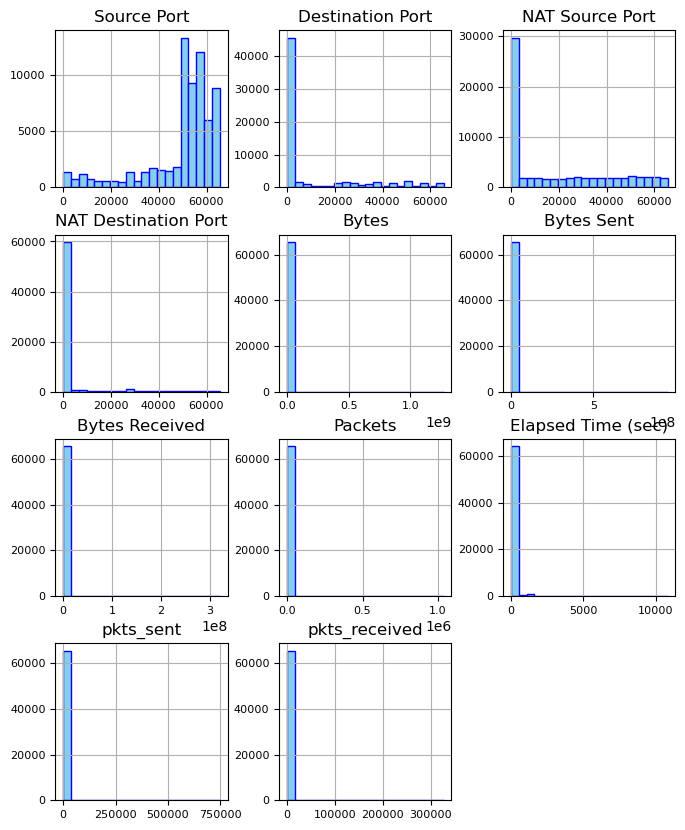

In [9]:
df.hist(bins=20,figsize=(8,10),color='skyblue',edgecolor='blue',xlabelsize=8,ylabelsize=8);

## 4. Handling Missing Value

In [10]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

- No missing values 
- As there is no missing values we can proceed with our data preprocessing 

## 5. Preprocessing the model using label encoder.

In [11]:
df.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
df.Action=le.fit_transform(df.Action)

In [15]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,0,177,94,83,2,30,1,1
1,56258,3389,56258,3389,0,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,0,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,0,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,0,25358,6778,18580,31,16,13,18


In [16]:
df.Action.unique()

array([0, 2, 1, 3])

- As we are using label encoder to preprocess the data the label encoder assigns the values in alphabetical order therefore the values assign are 
- 0 = allow
- 1 = deny
- 2 = drop
- 3 = reset-both

## 6. Model Building 

### a. Split the data in training and testing 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_train,df_test=train_test_split(df,test_size=.3)

In [19]:
df_train_x=df_train.drop(['Action'],axis=1)
df_train_y=df_train['Action']

df_test_x=df_test.drop(['Action'],axis=1)
df_test_y=df_test['Action']

In [20]:
df_train_x.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
47194,56487,53,29660,53,778,103,675,2,31,1,1
47048,55093,445,0,0,70,70,0,1,0,1,0
7009,58638,5900,0,0,62,62,0,1,0,1,0
26190,55729,53,3835,53,256,96,160,4,42,2,2
1046,0,0,0,0,98,98,0,1,0,1,0


In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_df= DecisionTreeClassifier()

In [22]:
dt_df.fit(df_train_x,df_train_y)

DecisionTreeClassifier()

In [23]:
pred_dt=dt_df.predict(df_test_x)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
tab_dt=confusion_matrix(df_test_y,pred_dt)
tab_dt

array([[11265,     5,     0,     1],
       [    0,  4424,    10,     4],
       [    0,     8,  3938,     0],
       [    0,     3,     0,     2]], dtype=int64)

In [26]:
accuracy_score(df_test_y,pred_dt)*100

99.84231943031536

In [27]:
import pickle

pickle.dump(dt_df, open('dt_df.pkl','wb')) 